In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url='/content/drive/MyDrive/Outsourcing Projects/GroundWater Level/'
df=pd.read_excel(base_url+'input_data_gwl.xlsx')
df.dropna(inplace=True)
df.head()

,Date,Well number,GWL (m),Rainfall mm,Min air temp. C,Max air temp. C,Ave. air temp. C,Clay %,Silt %,Sand %,Permeability sm/day,Porosity %,Specific yield %,Field capacity mm,Bulk density g/cm3,Meteo station ID
1,2000/01,1722155.0,0.82,22.1,-9.1,21.7,5.2,36.0,25.0,39.0,24.5,32.0,13.0,28.7,1.53,3.0
2,2000/02,1722155.0,0.96,8.7,-6.9,20.8,6,36.0,25.0,39.0,24.5,32.0,13.0,28.7,1.53,3.0
3,2000/03,1722155.0,1.06,19.1,-1.5,33.6,11.8,36.0,25.0,39.0,24.5,32.0,13.0,28.7,1.53,3.0
4,2000/04,1722155.0,1.05,1.6,4.7,37.5,22.4,36.0,25.0,39.0,24.5,32.0,13.0,28.7,1.53,3.0
5,2000/05,1722155.0,1.02,0,6.9,42.2,27.1,36.0,25.0,39.0,24.5,32.0,13.0,28.7,1.53,3.0


In [3]:
df.describe()

,Well number,Min air temp. C,Max air temp. C,Clay %,Silt %,Sand %,Permeability sm/day,Porosity %,Specific yield %,Field capacity mm,Bulk density g/cm3,Meteo station ID
count,2.138400e+04,21384.000000,21384.000000,21384.000000,21384.000000,21384.000000,21384.000000,21384.000000,21384.000000,21384.000000,21384.000000,21384.000000
mean,1.722102e+06,5.187065,31.688632,15.625926,20.127160,64.196296,304.527407,37.160494,24.098765,19.277037,1.472963,2.629630
std,5.423033e+01,9.327765,8.782695,14.315498,17.749169,28.656953,329.148804,5.234050,8.776724,9.828699,0.069416,1.070902
min,1.722001e+06,-21.700000,2.900000,2.200000,3.100000,20.000000,8.220000,32.000000,5.000000,8.200000,1.270000,1.000000
25%,1.722054e+06,-2.000000,24.100000,2.200000,3.100000,30.000000,63.000000,33.000000,17.000000,8.200000,1.400000,2.000000
50%,1.722112e+06,4.800000,33.000000,13.500000,16.800000,69.700000,74.570000,33.000000,32.000000,24.200000,1.510000,3.000000
75%,1.722153e+06,13.500000,39.000000,21.000000,25.000000,94.600000,606.000000,43.000000,32.000000,24.600000,1.510000,3.000000
max,1.722176e+06,27.200000,48.000000,56.300000,49.000000,94.600000,1203.000000,49.000000,32.000000,43.200000,1.550000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21384 entries, 1 to 21384
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21384 non-null  object 
 1   Well number          21384 non-null  float64
 2   GWL (m)              21384 non-null  object 
 3   Rainfall mm          21384 non-null  object 
 4   Min air temp. C      21384 non-null  float64
 5   Max air temp. C      21384 non-null  float64
 6   Ave. air temp. C     21384 non-null  object 
 7   Clay %               21384 non-null  float64
 8   Silt %               21384 non-null  float64
 9   Sand %               21384 non-null  float64
 10  Permeability sm/day  21384 non-null  float64
 11  Porosity %           21384 non-null  float64
 12  Specific yield %     21384 non-null  float64
 13  Field capacity mm    21384 non-null  float64
 14  Bulk density g/cm3   21384 non-null  float64
 15  Meteo station ID     21384 non-null  floa

In [5]:
object_cols=df.select_dtypes(include='object').columns.tolist()[1:]
def convert_str_to_float(columns=object_cols):
  for col in columns:
    df[col]=df[col].apply(lambda x: x.replace(' ','').replace(',','.') if isinstance(x,str) else x).astype(np.float64)
convert_str_to_float()

In [6]:
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%Y/%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21384 entries, 1 to 21384
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21384 non-null  object 
 1   Well number          21384 non-null  float64
 2   GWL (m)              21384 non-null  float64
 3   Rainfall mm          21384 non-null  float64
 4   Min air temp. C      21384 non-null  float64
 5   Max air temp. C      21384 non-null  float64
 6   Ave. air temp. C     21384 non-null  float64
 7   Clay %               21384 non-null  float64
 8   Silt %               21384 non-null  float64
 9   Sand %               21384 non-null  float64
 10  Permeability sm/day  21384 non-null  float64
 11  Porosity %           21384 non-null  float64
 12  Specific yield %     21384 non-null  float64
 13  Field capacity mm    21384 non-null  float64
 14  Bulk density g/cm3   21384 non-null  float64
 15  Meteo station ID     21384 non-null  floa

<ipython-input-6-24a59021b1e6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date']).dt.strftime('%Y/%m')


In [7]:
numeric_cols=df.select_dtypes(exclude='object').columns.tolist()
df[numeric_cols].corr().style.background_gradient(cmap='coolwarm')

,Well number,GWL (m),Rainfall mm,Min air temp. C,Max air temp. C,Ave. air temp. C,Clay %,Silt %,Sand %,Permeability sm/day,Porosity %,Specific yield %,Field capacity mm,Bulk density g/cm3,Meteo station ID
Well number,1.000000,0.105633,-0.153864,0.000040,0.102056,0.003534,-0.240372,0.048885,0.089734,0.206723,0.079901,0.165796,-0.196864,-0.092029,0.609985
GWL (m),0.105633,1.000000,0.024922,0.007986,-0.033666,-0.012353,-0.197823,-0.062358,0.137013,0.147422,0.070320,0.135317,-0.187905,-0.159487,0.110024
Rainfall mm,-0.153864,0.024922,1.000000,-0.498059,-0.495170,-0.516598,0.033537,0.015572,-0.026383,-0.033282,0.004869,-0.031228,0.024201,-0.008216,-0.172281
Min air temp. C,0.000040,0.007986,-0.498059,1.000000,0.852922,0.924014,0.001395,-0.013629,0.007745,-0.005819,-0.020020,-0.000698,0.000186,0.019721,0.075535
Max air temp. C,0.102056,-0.033666,-0.495170,0.852922,1.000000,0.921689,-0.022537,-0.004348,0.013941,0.026180,0.006595,0.021280,-0.016100,-0.004695,0.074819
Ave. air temp. C,0.003534,-0.012353,-0.516598,0.924014,0.921689,1.000000,0.000842,-0.008178,0.004644,0.001272,-0.009018,0.000952,-0.000353,0.007796,0.031552
Clay %,-0.240372,-0.197823,0.033537,0.001395,-0.022537,0.000842,1.000000,0.597482,-0.868531,-0.741461,0.429925,-0.927086,0.931857,-0.482210,-0.138859
Silt %,0.048885,-0.062358,0.015572,-0.013629,-0.004348,-0.008178,0.597482,1.000000,-0.916371,-0.721247,0.701071,-0.741159,0.696815,-0.654014,-0.088458
Sand %,0.089734,0.137013,-0.026383,0.007745,0.013941,0.004644,-0.868531,-0.916371,1.000000,0.815788,-0.648127,0.921157,-0.895799,0.645317,0.124107
Permeability sm/day,0.206723,0.147422,-0.033282,-0.005819,0.026180,0.001272,-0.741461,-0.721247,0.815788,1.000000,-0.579827,0.705487,-0.862486,0.402428,0.079163


In [8]:
numeric_df=df[['Clay %','Silt %','Sand %','Date','Well number','GWL (m)', 'Rainfall mm', 'Min air temp. C','Max air temp. C', 'Ave. air temp. C']]
numeric_df.head()

,Clay %,Silt %,Sand %,Date,Well number,GWL (m),Rainfall mm,Min air temp. C,Max air temp. C,Ave. air temp. C
1,36.0,25.0,39.0,2000/01,1722155.0,0.82,22.1,-9.1,21.7,5.2
2,36.0,25.0,39.0,2000/02,1722155.0,0.96,8.7,-6.9,20.8,6.0
3,36.0,25.0,39.0,2000/03,1722155.0,1.06,19.1,-1.5,33.6,11.8
4,36.0,25.0,39.0,2000/04,1722155.0,1.05,1.6,4.7,37.5,22.4
5,36.0,25.0,39.0,2000/05,1722155.0,1.02,0.0,6.9,42.2,27.1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [10]:
numeric_df_scaled=numeric_df.copy()
cat_cols=['Well number']
numeric_cols=['Rainfall mm','Min air temp. C','Max air temp. C', 'Ave. air temp. C']
ordinal_encoder=OrdinalEncoder()
min_max_scaler=MinMaxScaler()

processor=ColumnTransformer([
    ('ordinal_encoder',ordinal_encoder,cat_cols),
    ('min_max_scaler',min_max_scaler,numeric_cols) ])

pipeline=Pipeline([
    ('processor',processor)
])
scaled_data=pipeline.fit_transform(numeric_df_scaled)
numeric_df_scaled[cat_cols]=scaled_data[:,:1]
numeric_df_scaled[numeric_cols]=scaled_data[:,1:]
numeric_df_scaled.head()

,Clay %,Silt %,Sand %,Date,Well number,GWL (m),Rainfall mm,Min air temp. C,Max air temp. C,Ave. air temp. C
1,36.0,25.0,39.0,2000/01,62.0,0.82,0.149526,0.257669,0.416851,0.283544
2,36.0,25.0,39.0,2000/02,62.0,0.96,0.058863,0.302658,0.396896,0.303797
3,36.0,25.0,39.0,2000/03,62.0,1.06,0.129229,0.413088,0.680710,0.450633
4,36.0,25.0,39.0,2000/04,62.0,1.05,0.010825,0.539877,0.767184,0.718987
5,36.0,25.0,39.0,2000/05,62.0,1.02,0.000000,0.584867,0.871397,0.837975


In [11]:
base_url='/content/drive/MyDrive/Outsourcing Projects/GroundWater Level/'
joblib.dump(pipeline,base_url+'pipeline.pkl')
pipe=joblib.load(base_url+'pipeline.pkl')
pipe.transform(numeric_df.iloc[[0]])

array([[62.        ,  0.14952639,  0.25766871,  0.41685144,  0.2835443 ]])

In [ ]:
#numeric_df_scaled=numeric_df.copy()
#cat_cols=['Well number','Clay %','Silt %','Sand %']
#numeric_cols=['Rainfall mm','Min air temp. C','Max air temp. C', 'Ave. air temp. C']
#def feature_scaling(data,cat_cols,numeric_cols):
  #ordinal_encoder=OrdinalEncoder()
  #encoded_values=ordinal_encoder.fit_transform(data[cat_cols])
  #numeric_df_scaled[['Well number','Clay %','Silt %','Sand %']]=encoded_values
  #min_max_scaler=MinMaxScaler()
  #scaled_values=min_max_scaler.fit_transform(numeric_df[['Rainfall mm','Min air temp. C','Max air temp. C', 'Ave. air temp. C']])
  #numeric_df_scaled[['Rainfall mm','Min air temp. C','Max air temp. C', 'Ave. air temp. C']]=scaled_values
#numeric_df_scaled

In [222]:
input_num_cols=['GWL (m)','Rainfall mm','Min air temp. C','Max air temp. C', 'Ave. air temp. C']
#input_cat_cols=['Clay %','Silt %','Sand %']
#input_sequence=[]
sequence_length=12

def create_sequence(data,well_col,input_num_cols,sequence_length=sequence_length):
  input_sequence=[]
  for well_id in data[well_col].unique():
    well_df=data[data[well_col]==well_id].sort_values(by='Date')
    for seq_n in range(0,len(well_df)-sequence_length):
      num_sequence=well_df.iloc[seq_n:seq_n+sequence_length][input_num_cols]
      #cat_sequence=well_df.iloc[seq_n:seq_n+5][input_cat_cols]
      label=well_df.iloc[seq_n+sequence_length:seq_n+sequence_length+3]['GWL (m)'].values
      if label.shape==(3,):
        input_sequence.append((num_sequence.values,label))
  return input_sequence

input_sequence=create_sequence(numeric_df_scaled,'Well number',input_num_cols)

In [252]:
input_sequence[1]

(array([[0.96      , 0.05886333, 0.30265849, 0.39689579, 0.30379747],
        [1.06      , 0.12922869, 0.41308793, 0.68070953, 0.45063291],
        [1.05      , 0.01082544, 0.5398773 , 0.76718404, 0.71898734],
        [1.02      , 0.        , 0.58486708, 0.8713969 , 0.83797468],
        [0.99      , 0.        , 0.7198364 , 0.92904656, 0.88101266],
        [0.92      , 0.        , 0.83231084, 0.88470067, 0.92911392],
        [0.83      , 0.        , 0.75460123, 0.88913525, 0.88607595],
        [0.82      , 0.00541272, 0.62372188, 0.79600887, 0.75696203],
        [0.68      , 0.0541272 , 0.58691207, 0.61862528, 0.56455696],
        [0.76      , 0.07713126, 0.36809816, 0.48780488, 0.36962025],
        [0.91      , 0.03991881, 0.41513292, 0.3924612 , 0.33164557],
        [0.67      , 0.12313938, 0.24744376, 0.36141907, 0.21265823]]),
 array([0.83, 0.94, 0.91]))

In [254]:
train_X[0],train_y[0]

(array([[2.03100000e+01, 5.41271989e-02, 5.86912065e-01, 6.18625277e-01,
         5.64556962e-01],
        [2.03600000e+01, 7.71312585e-02, 3.68098160e-01, 4.87804878e-01,
         3.69620253e-01],
        [2.05600000e+01, 3.99188092e-02, 4.15132924e-01, 3.92461197e-01,
         3.31645570e-01],
        [2.08200000e+01, 1.23139378e-01, 2.47443763e-01, 3.61419069e-01,
         2.12658228e-01],
        [2.10100000e+01, 9.81055480e-02, 2.71983640e-01, 4.12416851e-01,
         3.36708861e-01],
        [2.11900000e+01, 1.17050068e-01, 3.78323108e-01, 6.38580931e-01,
         4.91139241e-01],
        [2.08300000e+01, 1.55615697e-02, 6.27811861e-01, 7.31707317e-01,
         7.16455696e-01],
        [2.02000000e+01, 0.00000000e+00, 7.21881391e-01, 8.75831486e-01,
         8.60759494e-01],
        [1.98500000e+01, 0.00000000e+00, 7.60736196e-01, 9.51219512e-01,
         9.21518987e-01],
        [1.98200000e+01, 0.00000000e+00, 7.66871166e-01, 8.86917960e-01,
         9.24050633e-01],
        [1

In [223]:
X,y=zip(*input_sequence)
y[-10:]

(array([21.33, 21.28, 21.69]),
 array([21.28, 21.69, 21.65]),
 array([21.69, 21.65, 22.83]),
 array([21.65, 22.83, 23.21]),
 array([22.83, 23.21, 24.27]),
 array([23.21, 24.27, 23.93]),
 array([24.27, 23.93, 23.89]),
 array([23.93, 23.89, 24.01]),
 array([23.89, 24.01, 24.11]),
 array([24.01, 24.11, 23.37]))

In [224]:
X,y=zip(*input_sequence)
X=np.array(X)
y=np.array(y)
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=23)
test_X,valid_X,test_y,valid_y=train_test_split(test_X,test_y,test_size=0.5,random_state=23)
print(f"train_X shape: {train_X.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_X shape: {test_X.shape}")
print(f"test_y shape: {test_y.shape}")
print(f"valid_X shape: {valid_X.shape}")
print(f"valid_y shape: {valid_y.shape}")

train_X shape: (16200, 12, 5)
train_y shape: (16200, 3)
test_X shape: (2025, 12, 5)
test_y shape: (2025, 3)
valid_X shape: (2025, 12, 5)
valid_y shape: (2025, 3)


In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input,Model
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding,Input,Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [228]:
#inputs=Input(shape=(5,5))
#X=LSTM(units=64,return_sequences=True)(inputs)
#X=LSTM(units=32,return_sequences=True)(X)
#X=LSTM(units=16,return_sequences=False)(X)
#X=Dense(16,activation='relu')(X)
#outputs=Dense(1,activation='linear')(X)
#model=Model(inputs=inputs,outputs=outputs)



#len_category_1=numeric_df['Clay %'].unique().shape[0]
#len_category_2=numeric_df['Silt %'].unique().shape[0]
#len_category_3=numeric_df['Sand %'].unique().shape[0]
#embedding_dim=4
#sequence_len=5
#numeric_features=5
#category_input_1=Input(shape=(sequence_len,),name='category_input_1')
#category_input_2=Input(shape=(sequence_len,),name='category_input_2')
#category_input_3=Input(shape=(sequence_len,),name='category_input_3')

#numeric_input=Input(shape=(sequence_len,numeric_features),name='numeric_input')

#category_1_embedding=Embedding(input_dim=len_category_1,output_dim=embedding_dim)(category_input_1)
#category_2_embedding=Embedding(input_dim=len_category_2,output_dim=embedding_dim)(category_input_2)
#category_3_embedding=Embedding(input_dim=len_category_3,output_dim=embedding_dim)(category_input_3)

#combined_embeddings=Concatenate()([category_1_embedding,category_2_embedding,category_3_embedding])
#combined_input=Concatenate()([combined_embeddings,numeric_input])

#lstm_layer=LSTM(units=64,return_sequences=False)(combined_input)
#dense_layer_32=Dense(32,activation='relu')(lstm_layer)
#dense_layer_16=Dense(16,activation='relu')(dense_layer_32)
#outputs=Dense(1,activation='linear')(dense_layer_16)

#model=Model(inputs=[category_input_1,category_input_2,category_input_3,numeric_input],outputs=outputs)

model=Sequential([
    Input(shape=(12,5),dtype='float32',name='input_layer'),
    LSTM(units=64,return_sequences=False),
    Dense(32,activation='relu'),
    Dense(3,activation='linear')
])

model.compile(optimizer=Adam(learning_rate=3e-4),
              loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [229]:
#train_data=[train_X[:,:,0],train_X[:,:,1],train_X[:,:,2],train_X[:,:,3:8]]
#valid_data=[valid_X[:,:,0],valid_X[:,:,1],valid_X[:,:,2],valid_X[:,:,3:8]]
#test_data=[test_X[:,:,0],test_X[:,:,1],test_X[:,:,2],test_X[:,:,3:8]
model.fit(train_X,train_y,epochs=30,validation_data=(valid_X,valid_y))

Epoch 1/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 52.0649 - root_mean_squared_error: 7.0778 - val_loss: 3.0339 - val_root_mean_squared_error: 1.7418
Epoch 2/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9278 - root_mean_squared_error: 1.3787 - val_loss: 0.5557 - val_root_mean_squared_error: 0.7455
Epoch 3/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4891 - root_mean_squared_error: 0.6986 - val_loss: 0.3890 - val_root_mean_squared_error: 0.6237
Epoch 4/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3729 - root_mean_squared_error: 0.6103 - val_loss: 0.3329 - val_root_mean_squared_error: 0.5770
Epoch 5/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3350 - root_mean_squared_error: 0.5786 - val_loss: 0.3224 - val_root_mean_squared_error: 0.5678
Epoch 6/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3007 - root_mean_squared_error: 0.5479 - val_loss: 0.3317 - val_root_mean_squared_error: 0.5759
Epoch 7/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/ste

In [230]:
model.evaluate(test_X,test_y)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3405 - root_mean_squared_error: 0.5773


[0.3718497157096863, 0.6097947955131531]

In [231]:
from sklearn.metrics import r2_score
test_pred=model.predict(test_X)
r2_score(test_y,test_pred)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.9923789761291001

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


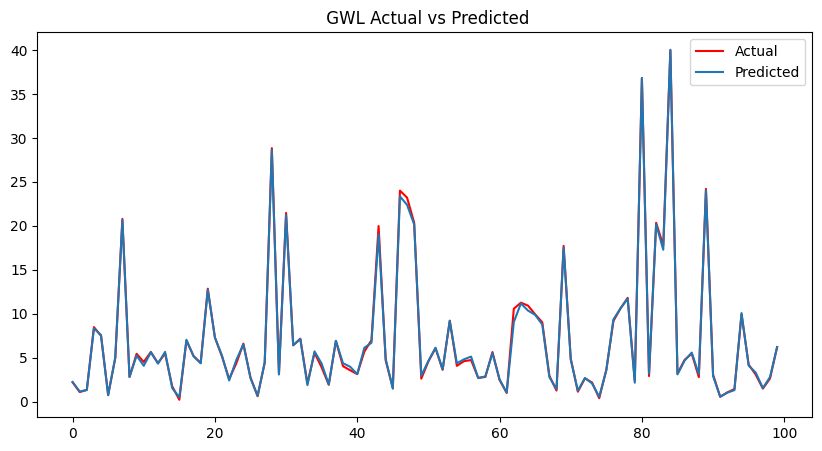

In [232]:
test_pred=model.predict(test_X)
plt.figure(figsize=(10,5))
plt.plot(test_y[1200:1300][:,0],label='Actual',color='r')
plt.plot(test_pred[1200:1300][:,0],label='Predicted')
plt.title(' GWL Actual vs Predicted')
plt.legend()
plt.show()

In [261]:
base_url='/content/drive/MyDrive/Outsourcing Projects/GroundWater Level/'
model.save(base_url+'lstm_sequential_model.keras')

In [234]:
#import tensorflow
#x=tensorflow.keras.models.load_model(base_url+'lstm_sequential_model.keras')

In [271]:
model.save(base_url+'lstm_sequential_model.h5')